# INTRODUCTION
<font color = blue>
Content:
    
    
        1.[Overview Data](#1)
        2.[Exploratory Data Analysis](#2)
        3.[Preprocessing](#3)
        4.[Prediction](#4)
        5.[Residuals and Metrics](#5)
        

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-time/deliverytime.csv


<a id = '1'></a><br>
# Overview Data

In [2]:
df = pd.read_csv('/kaggle/input/food-delivery-time/deliverytime.csv')

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.632367,0.327708,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


In [6]:
def print_null_total_data(data):
    null_data_sum = data.isna().sum()
    null_data_percent = data.isna().sum() / len(data)
    null_data_percent = null_data_percent.apply(lambda x: f"{x:.1%}")
    null_df = pd.concat([null_data_sum, null_data_percent], axis=1)
    null_df.columns = ['Null Total Data', 'Null Total Data Percent']
    return null_df
print_null_total_data(df)

,Null Total Data,Null Total Data Percent
ID,0,0.0%
Delivery_person_ID,0,0.0%
Delivery_person_Age,0,0.0%
Delivery_person_Ratings,0,0.0%
Restaurant_latitude,0,0.0%
Restaurant_longitude,0,0.0%
Delivery_location_latitude,0,0.0%
Delivery_location_longitude,0,0.0%
Type_of_order,0,0.0%
Type_of_vehicle,0,0.0%


In [7]:
df.duplicated().sum()

0

**Great! We have healthy data we can continue**

<a id = '2'></a><br>
# 2.Exploratory Data Analysis(EDA)

In [8]:
cols_num = df.select_dtypes(include = ['float','int']).columns.to_list()
for col in cols_num:
    print('--' * 30)
    print(f'Variable: {col}\n')
    print(f'Skew = {df[col].skew()}')
    print(f'Kurtosis = {df[col].kurt()}')
    print('\n')

------------------------------------------------------------
Variable: Delivery_person_Age

Skew = 0.031155096242588325
Kurtosis = -0.9771766885739264


------------------------------------------------------------
Variable: Delivery_person_Ratings

Skew = -2.532896466162441
Kurtosis = 16.42567851760694


------------------------------------------------------------
Variable: Restaurant_latitude

Skew = -1.3615831300808896
Kurtosis = 3.713715985814404


------------------------------------------------------------
Variable: Restaurant_longitude

Skew = -3.2201593747515562
Kurtosis = 10.303039055899829


------------------------------------------------------------
Variable: Delivery_location_latitude

Skew = -0.7010664586700632
Kurtosis = 0.2643458350175192


------------------------------------------------------------
Variable: Delivery_location_longitude

Skew = -2.956384938746632
Kurtosis = 7.104450945184157


------------------------------------------------------------
Variable: Time_t

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Time_taken(min)', ylabel='Type_of_vehicle'>

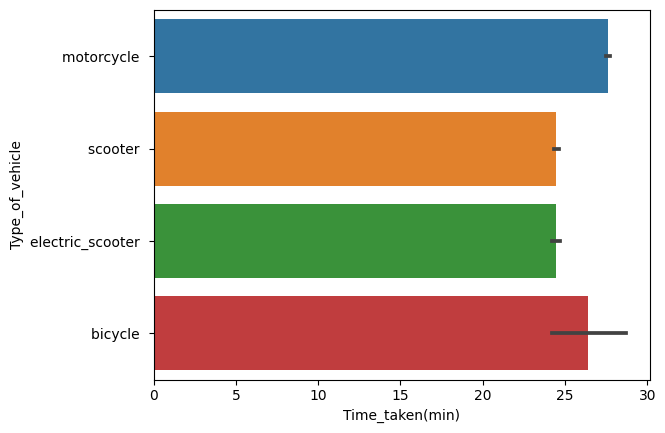

In [10]:
sns.barplot(data=df, y='Type_of_vehicle', x='Time_taken(min)')

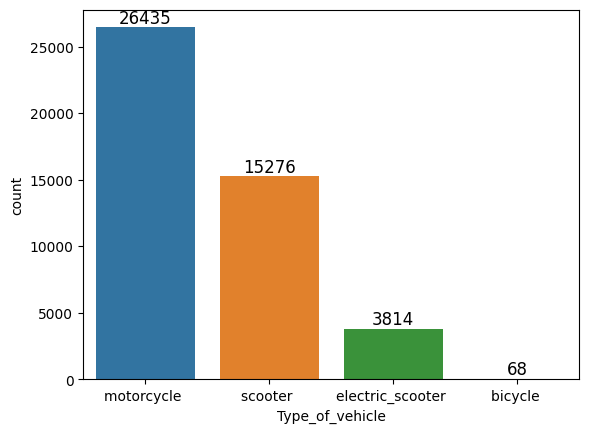

In [11]:
sns.countplot(data=df, x='Type_of_vehicle')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', fontsize=12, ha='center', va='bottom')

In [12]:
import plotly.express as px

In [13]:
fig = px.pie(df, names='Type_of_order', hole=.3, title='Type of orders distribution')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [14]:
fig = px.pie(df, names='Delivery_person_Age', hole=.5, title='Courier age distribution')
fig.update_traces(textposition='inside', textinfo='percent+value+label')
fig.show()

In [15]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [16]:
fig = px.scatter_geo(data_frame=df[df['Delivery_person_Age'].notnull()], lat='Delivery_location_latitude', lon='Delivery_location_longitude', hover_data='Type_of_vehicle',scope='asia', color='Delivery_person_Age', template="plotly_dark", title='Overview')
fig.show()

In [17]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [18]:
from haversine import haversine, Unit
def distance_km(row):
    coord1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    coord2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    
    distance = haversine(coord1, coord2, unit = Unit.KILOMETERS)
    
    return distance

In [19]:
df['distance_km'] = df.apply(distance_km, axis=1)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance_km
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025153
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183558
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552760
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790412
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210147


**That's enough for exploratory data we can jump next step**

<a id = '3'></a><br>
# 3.Preprocessing

In [20]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance_km
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025153
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183558
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552760
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790412
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210147
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1.489848
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,11.007750
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4.657202
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6.232402


In [21]:
df_copy = df.copy()
df_copy.drop(['ID', 'Delivery_person_ID', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1, inplace=True)

In [22]:
df_copy

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance_km
0,37,4.9,Snack,motorcycle,24,3.025153
1,34,4.5,Snack,scooter,33,20.183558
2,23,4.4,Drinks,motorcycle,26,1.552760
3,38,4.7,Buffet,motorcycle,21,7.790412
4,32,4.6,Snack,scooter,30,6.210147
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.489848
45589,21,4.6,Buffet,motorcycle,36,11.007750
45590,30,4.9,Drinks,scooter,16,4.657202
45591,20,4.7,Snack,motorcycle,26,6.232402


In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int64  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Type_of_order            45593 non-null  object 
 3   Type_of_vehicle          45593 non-null  object 
 4   Time_taken(min)          45593 non-null  int64  
 5   distance_km              45593 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ MB


In [24]:
x = df_copy.drop('Time_taken(min)', axis=1)
y = df_copy['Time_taken(min)']

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [28]:
numeric_columns = x_train.select_dtypes(include = ['float', 'int']).columns.to_list()
categorical_columns = x_train.select_dtypes(include = ['object','category']).columns.to_list()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.fit_transform(x_test)

**We are ready for load models and predict delivery time**

<a id = '4'></a><br>
# 4.Prediction

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import time

In [30]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_jobs=-1, random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNearestNeighbor': KNeighborsRegressor(),
    'VotingRegressor': VotingRegressor(estimators=[('kmeans', KNeighborsRegressor()), ('rfr', RandomForestRegressor())]),
    'StackingRegressor': StackingRegressor(estimators=[("lr", LinearRegression()), ('dtr', DecisionTreeRegressor())], final_estimator=RandomForestRegressor())    
}
y_pred_train = {}
y_pred_test = {}

results_run_time_models = []
for model_name, model in models.items():
    results_run_time_models.append(model_name)
    start = time.time()
    model.fit(x_train_encoded, y_train)
    end = time.time()
    print(f'* {model_name}: Total training time = {round(end - start,4)} seconds')
    y_pred_train[model_name] = model.predict(x_train_encoded)
    y_pred_test[model_name] = model.predict(x_test_encoded)

* LinearRegression: Total training time = 0.0339 seconds
* RandomForestRegressor: Total training time = 3.5326 seconds
* DecisionTreeRegressor: Total training time = 0.1356 seconds
* KNearestNeighbor: Total training time = 0.0436 seconds
* VotingRegressor: Total training time = 9.015 seconds
* StackingRegressor: Total training time = 8.4012 seconds


**Of course we can load more models. But im gonna stop here :)**

<a id = '5'></a><br>
# 5.Residuals and Metrics

In [31]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error 

from sklearn.metrics import mean_squared_error
import math

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

mse = mean_squared_error(y_test, y_pred_test[model_name])
mae = mean_absolute_error(y_test, y_pred_test[model_name])
r2 = r2_score(y_test, y_pred_test[model_name])
mape = mean_absolute_percentage_error(y_test, y_pred_test[model_name])
rmse_value = rmse(y_test, y_pred_test[model_name])

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse_value}")

MSE: 82.12539394392874
MAE: 7.141462795080502
R-squared: 0.056974167260867126
MAPE: 0.313113250026206
RMSE: 9.062306215524211


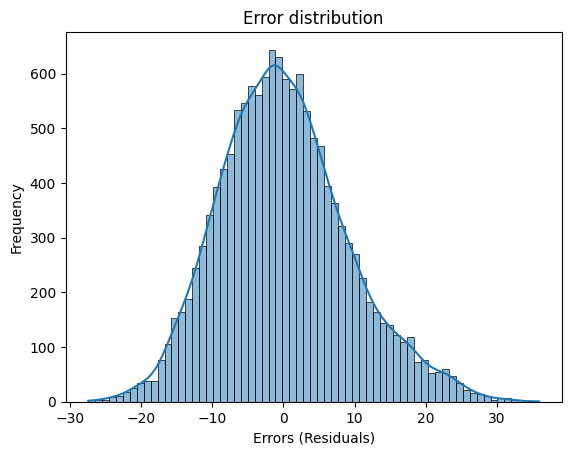

In [32]:
residuals = y_test - y_pred_test[model_name]
sns.histplot(residuals, kde=True)
plt.xlabel('Errors (Residuals)')
plt.ylabel('Frequency')
plt.title('Error distribution')
plt.show()

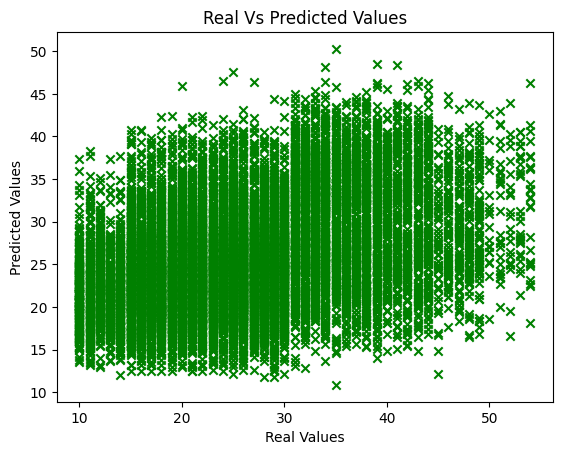

In [33]:
plt.scatter(y_test, y_pred_test[model_name], color='green', marker='x')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real Vs Predicted Values')
plt.show()

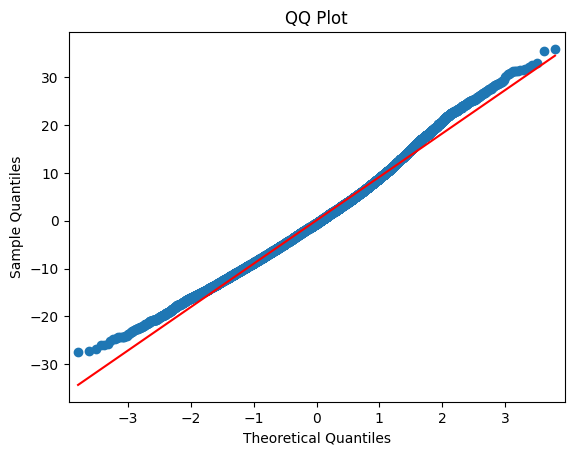

In [34]:
import statsmodels.api as sm

residuals = y_test - y_pred_test[model_name]
sm.qqplot(residuals, line='s')
plt.title('QQ Plot')
plt.show()

#### Thanks for inspecting the my notebook! Im newbie here. If u have any advices or questions let meet in comments. :) 